# Proyek Akhir: Menyelesaikan Permasalahan departemen Human Resources (HR)

- Nama:AMIR MAHMUD
- Email:amirmahmoed003@gmail.com
- Id Dicoding:amirrr

## Persiapan

### Menyiapkan library yang dibutuhkan

In [12]:
import pandas as pd

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

### Menyiapkan data yang akan diguankan

In [14]:
# URL file CSV dari GitHub
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"

# Membaca data dari URL ke dalam DataFrame
df = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [15]:
# Lihat struktur data
print("Jumlah baris & kolom:", df.shape)


Jumlah baris & kolom: (1470, 35)


In [16]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [17]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

#EDA

##EDA Univariate

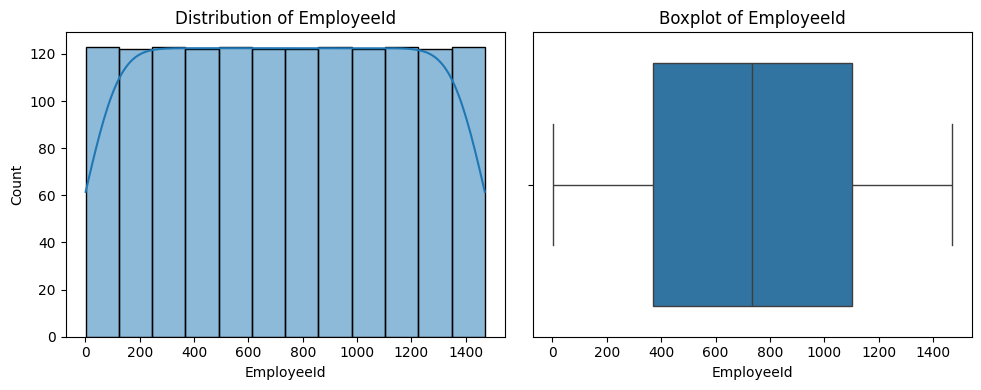

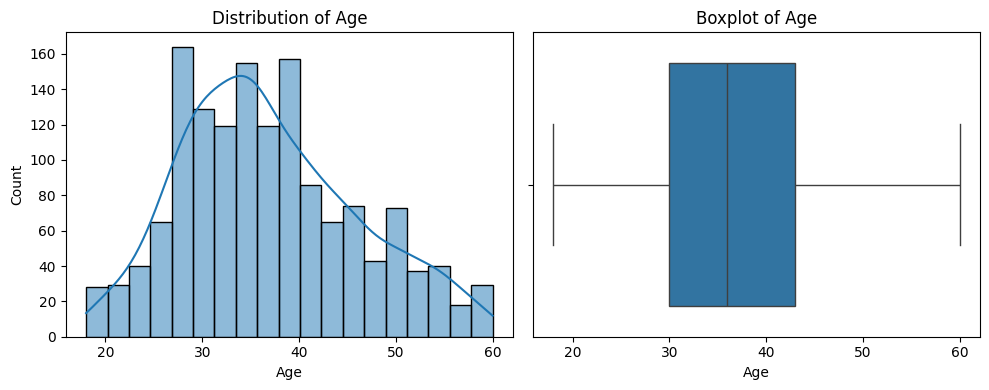

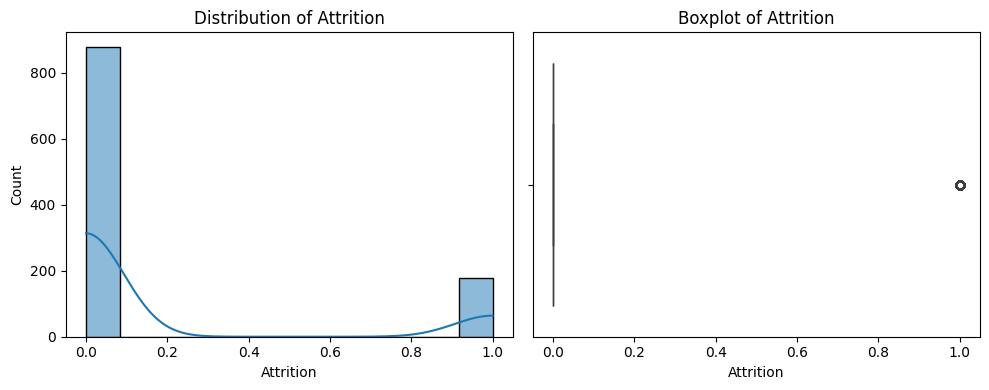

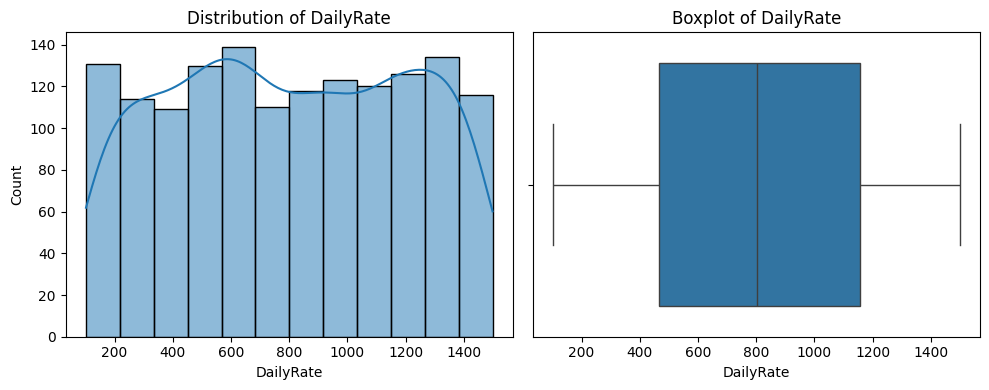

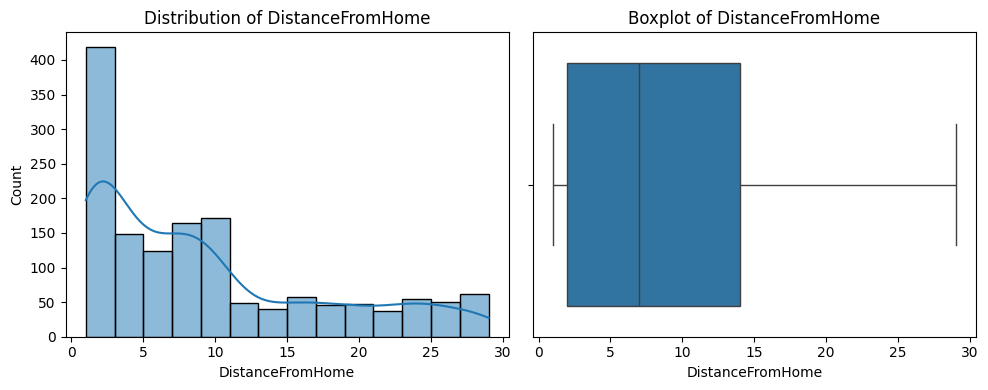

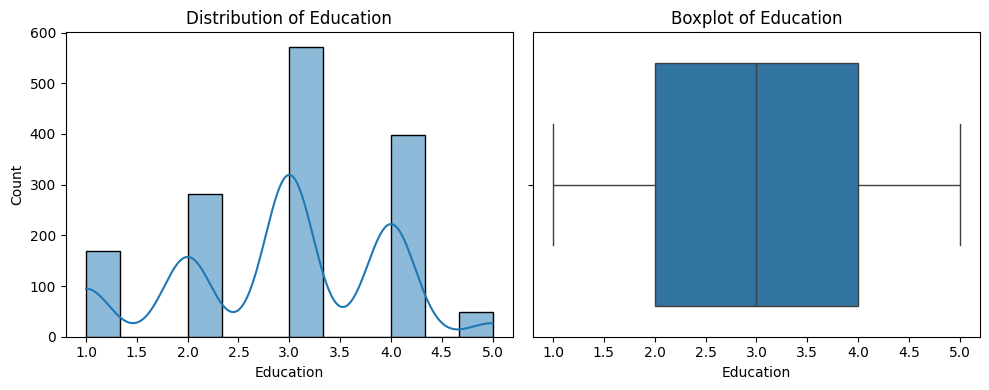

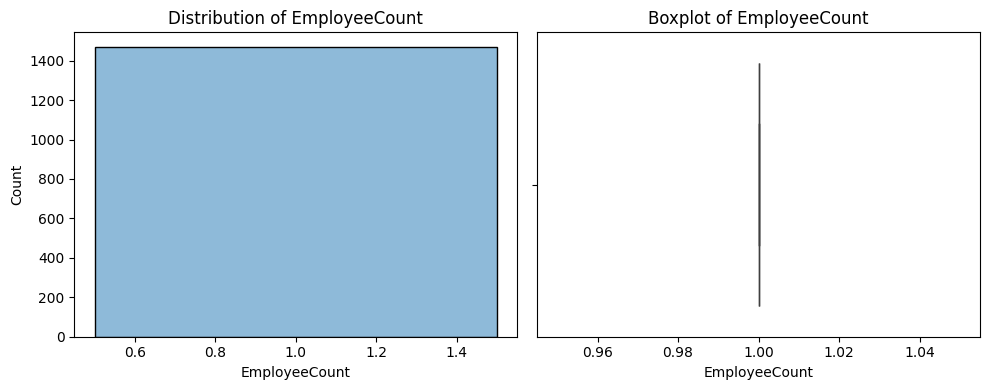

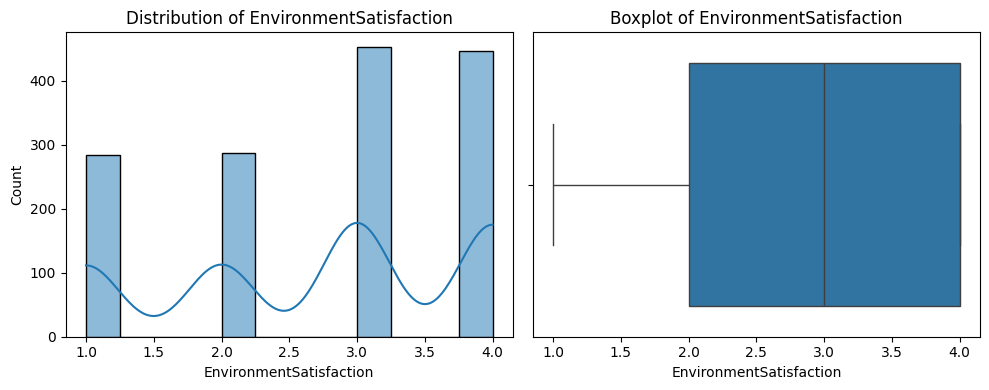

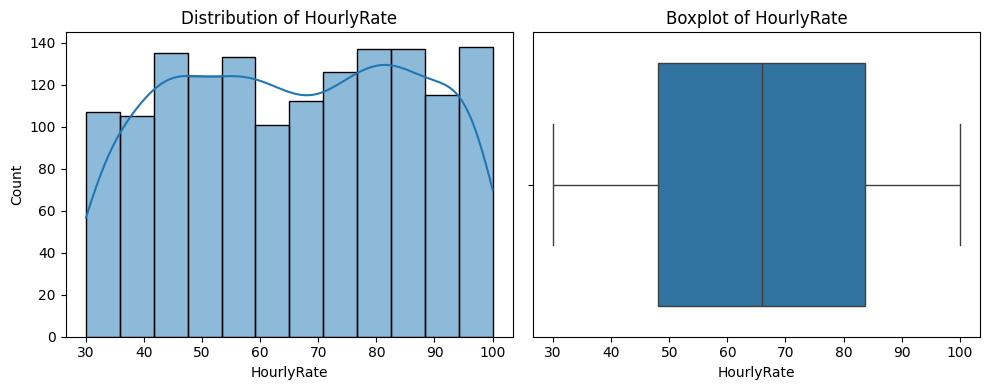

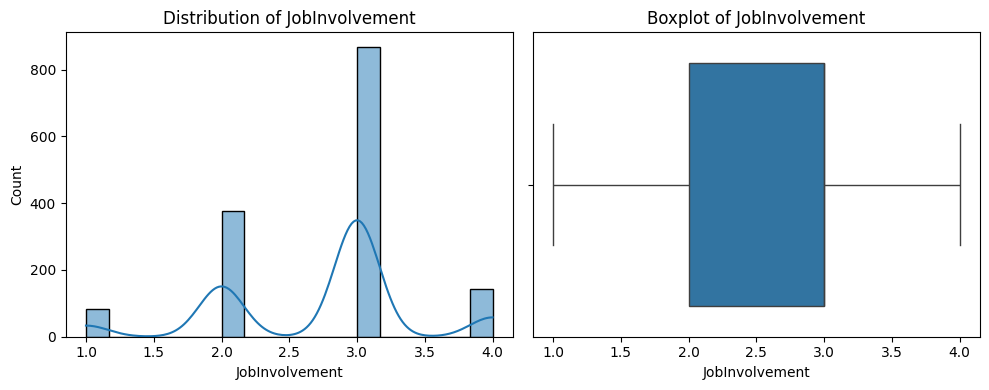

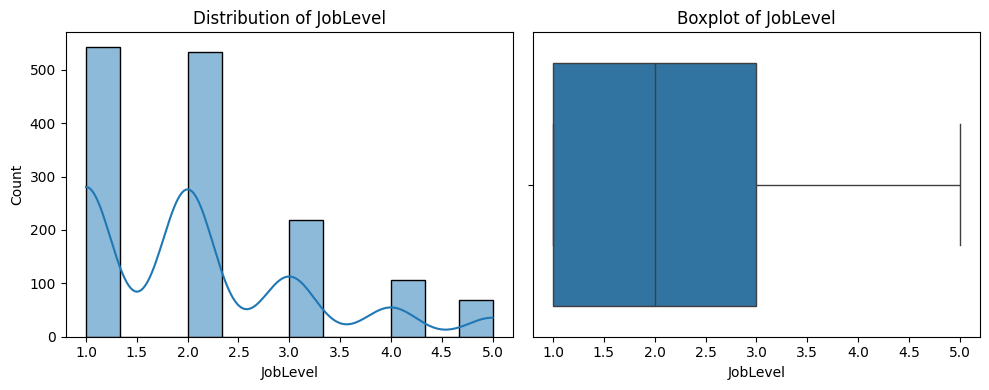

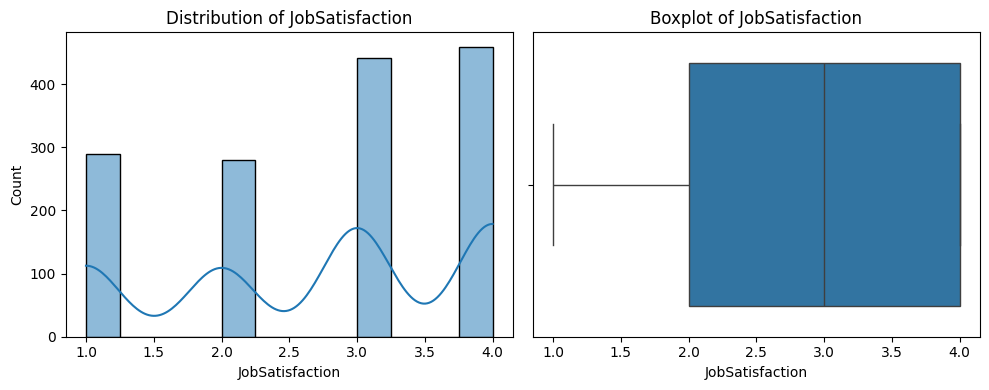

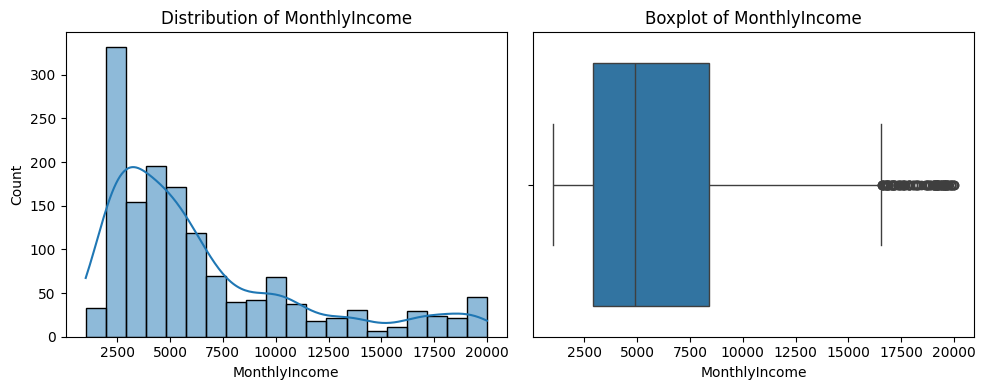

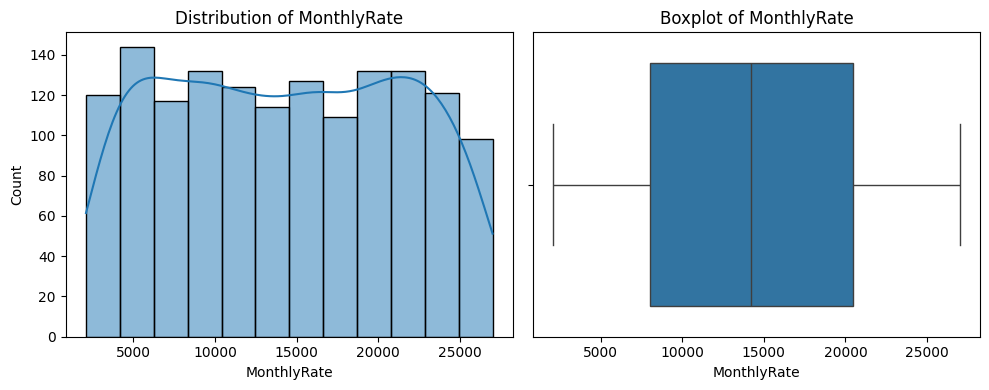

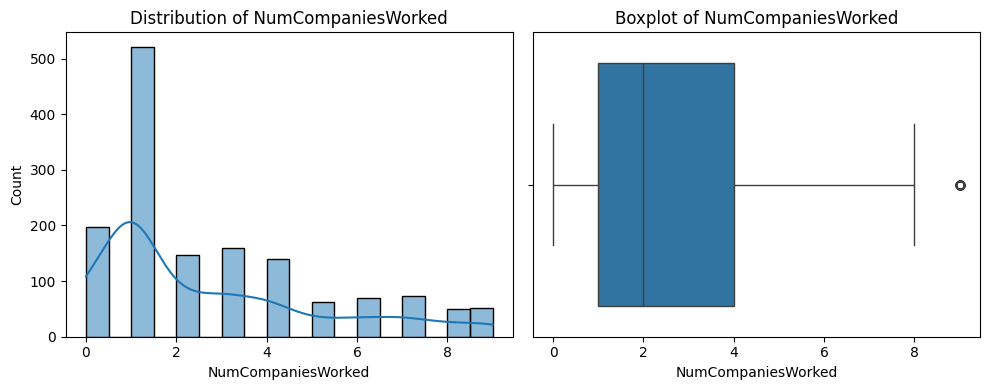

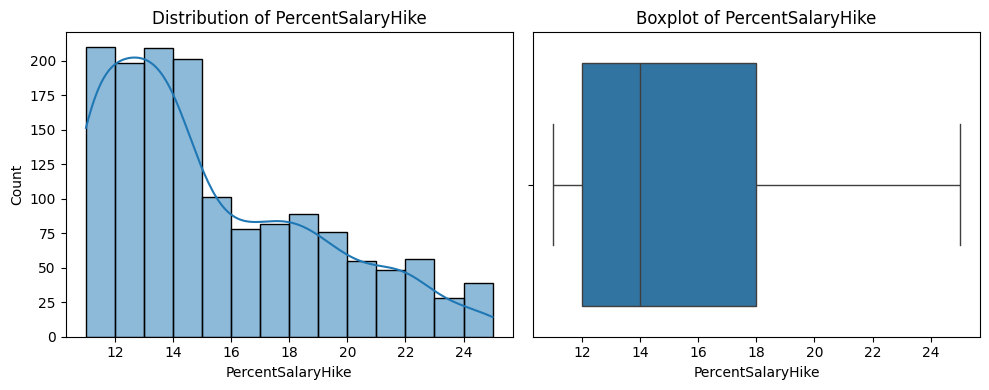

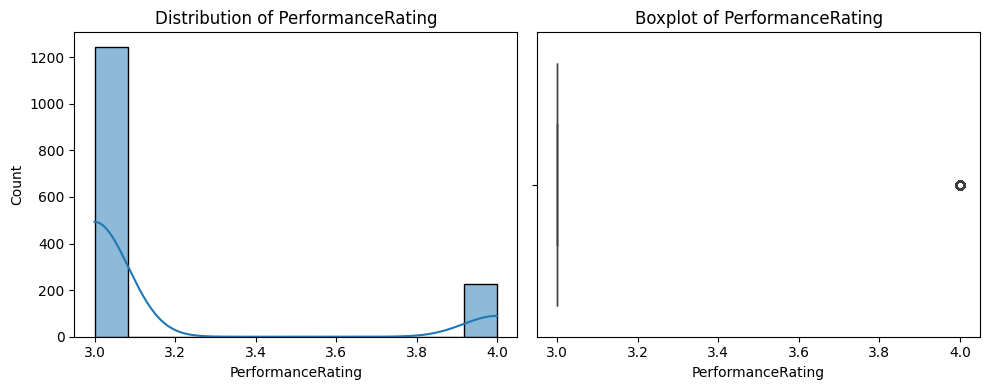

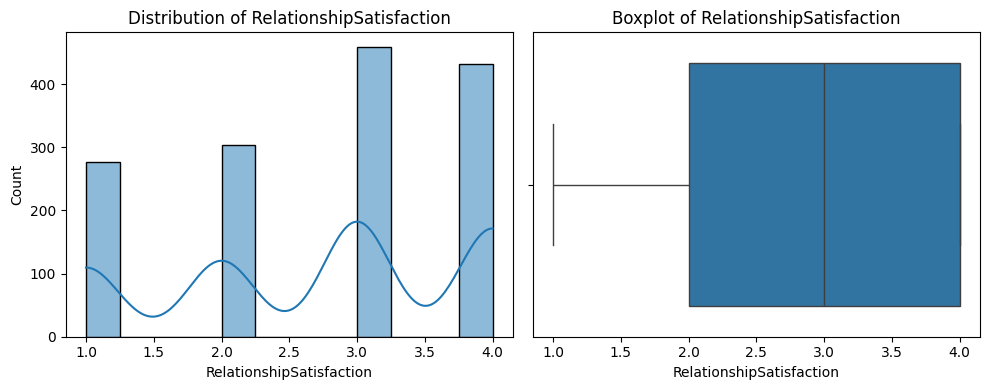

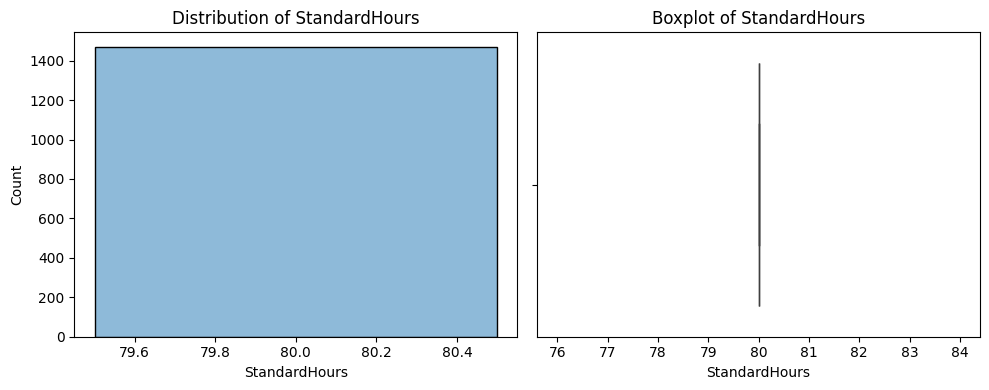

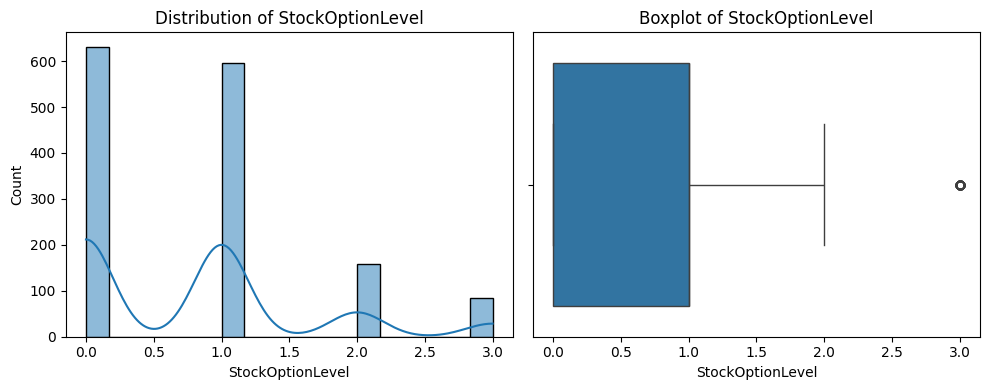

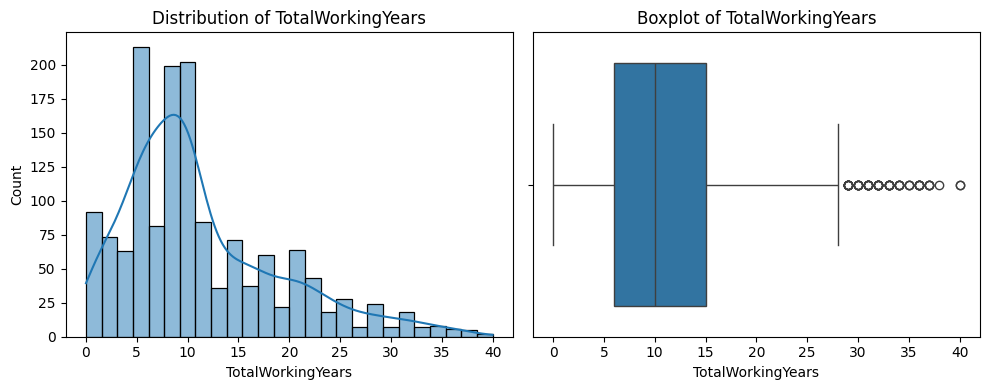

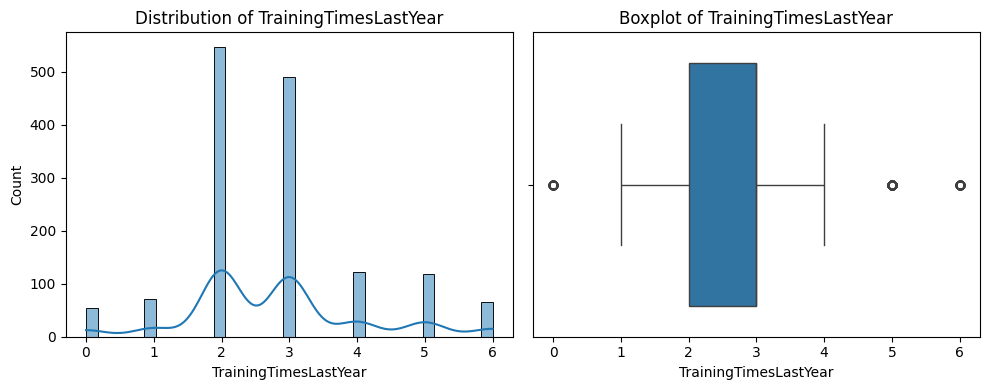

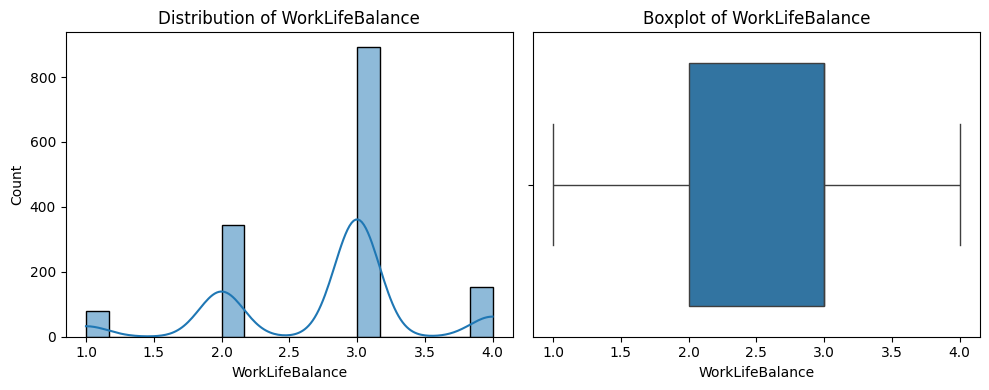

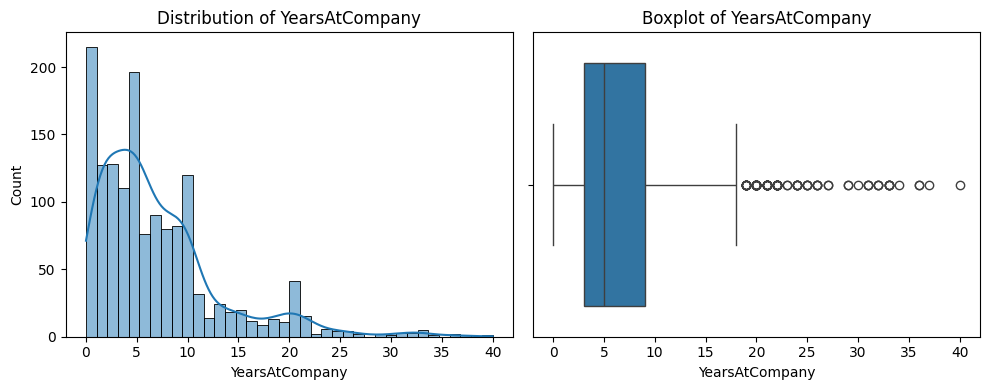

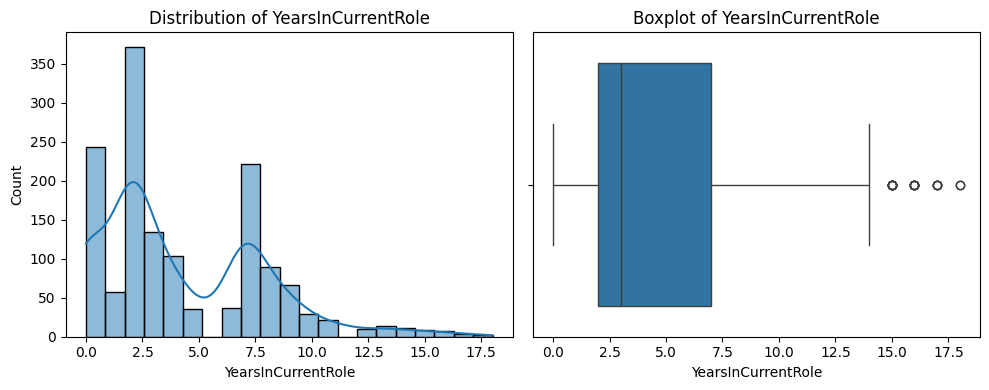

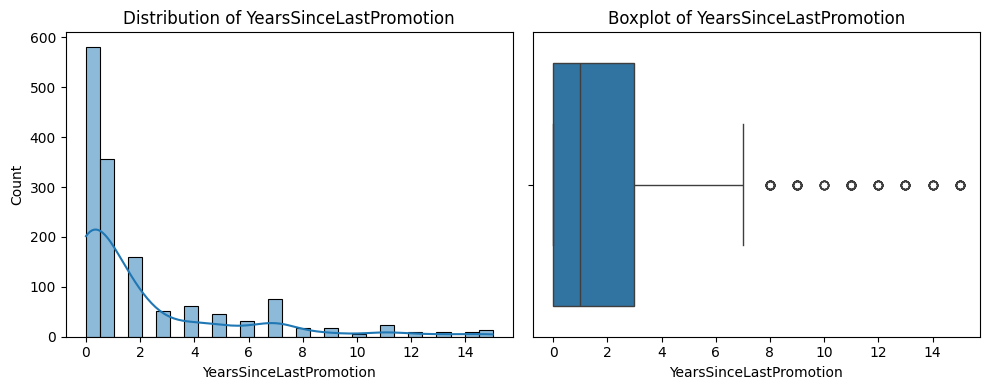

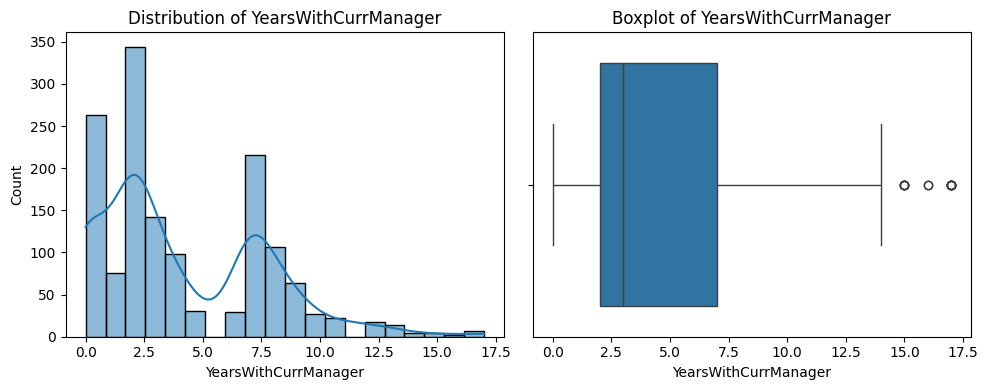

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


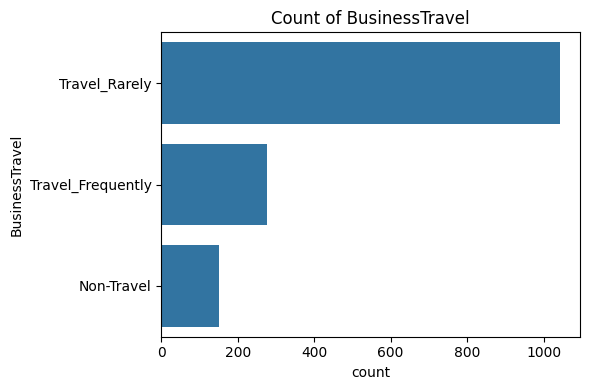

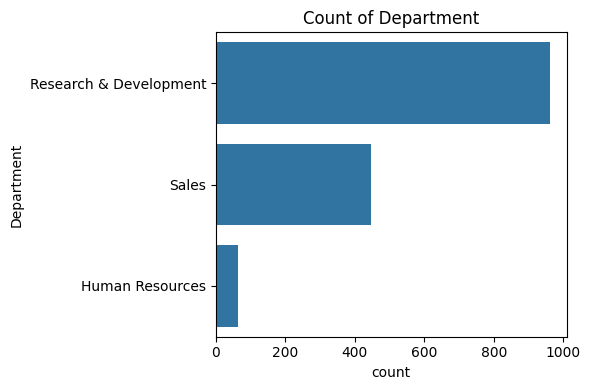

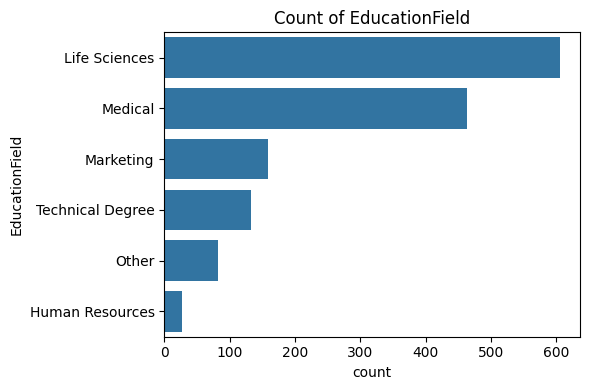

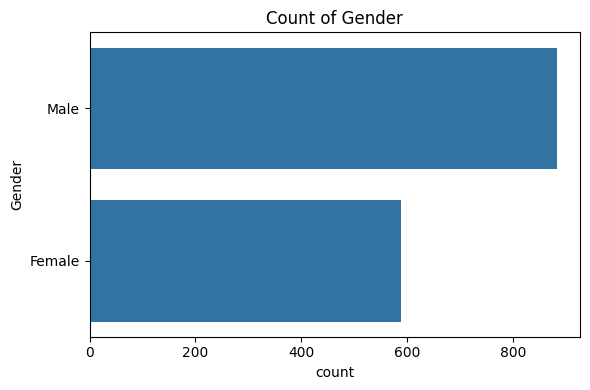

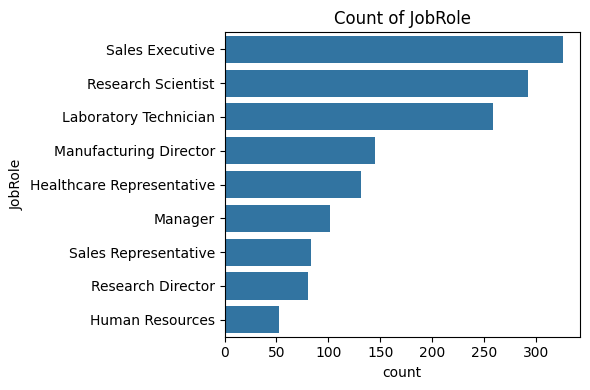

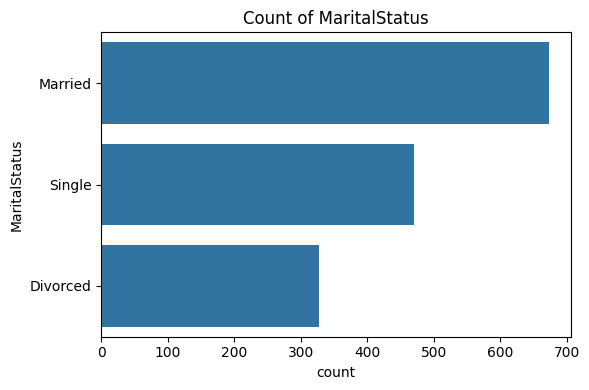

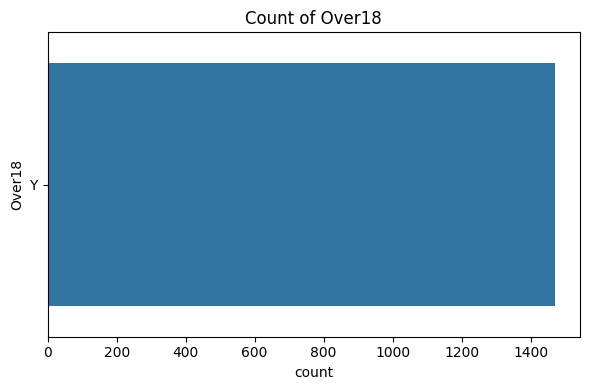

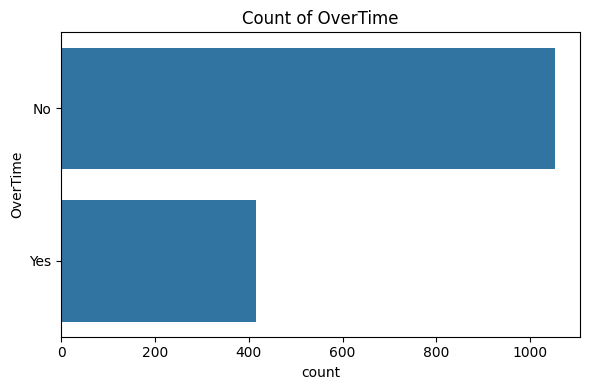

In [20]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()


##EDA Multivariate


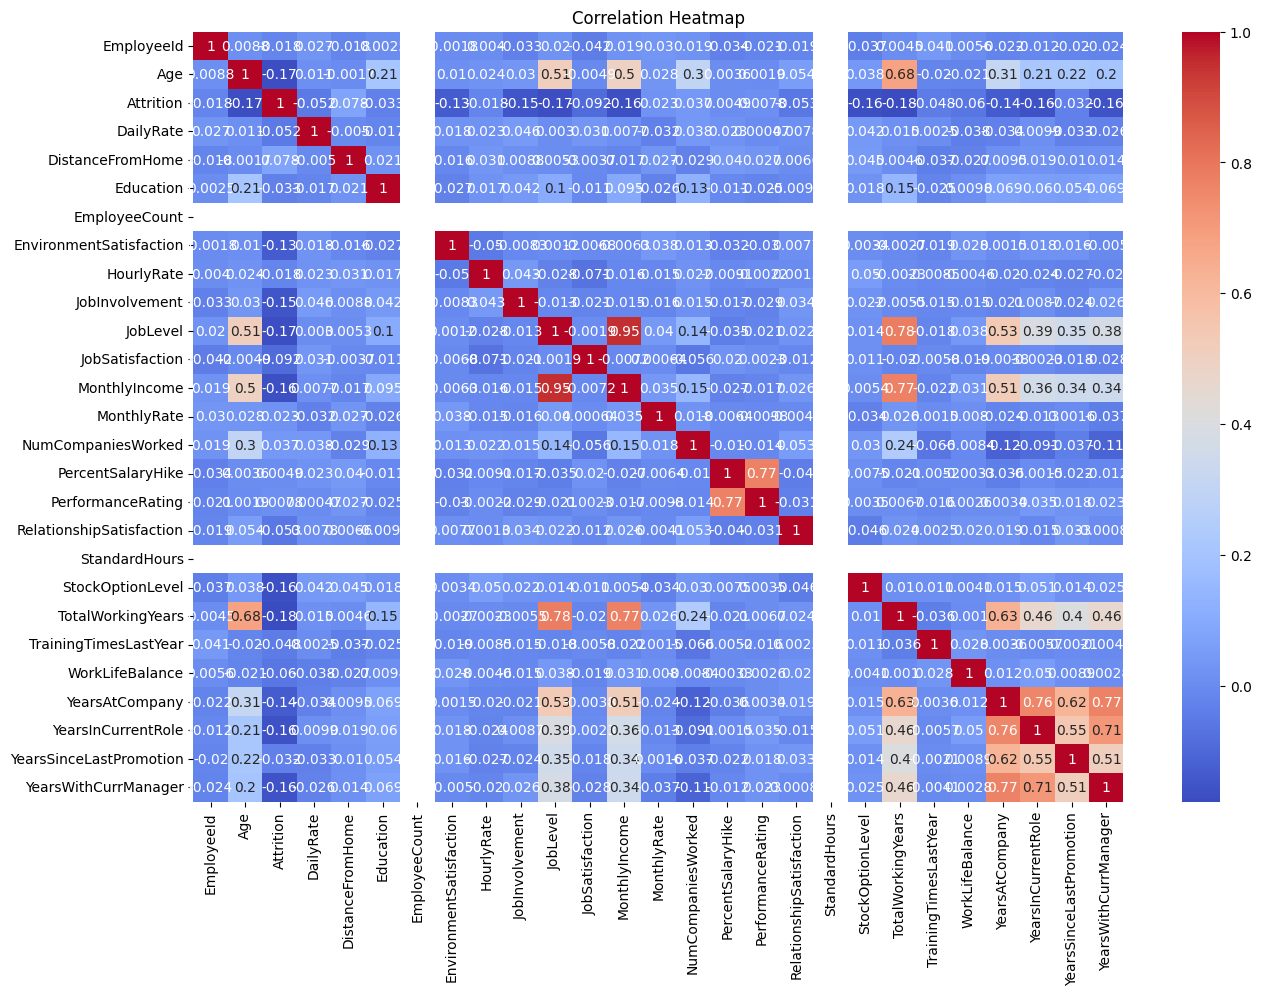

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


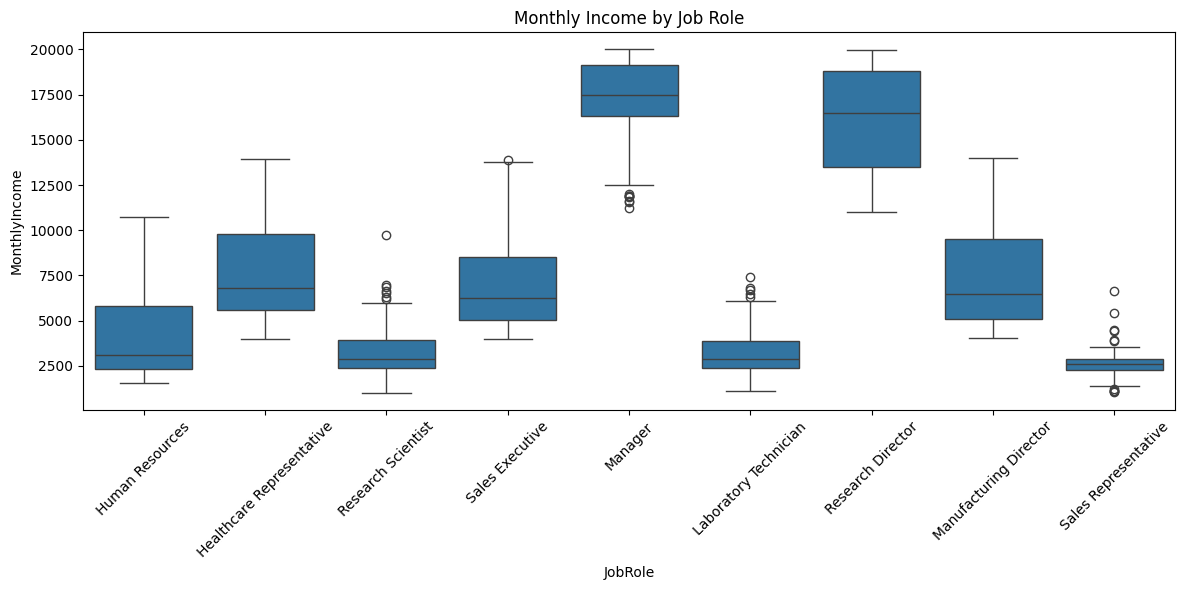

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.xticks(rotation=45)
plt.title('Monthly Income by Job Role')
plt.tight_layout()
plt.show()


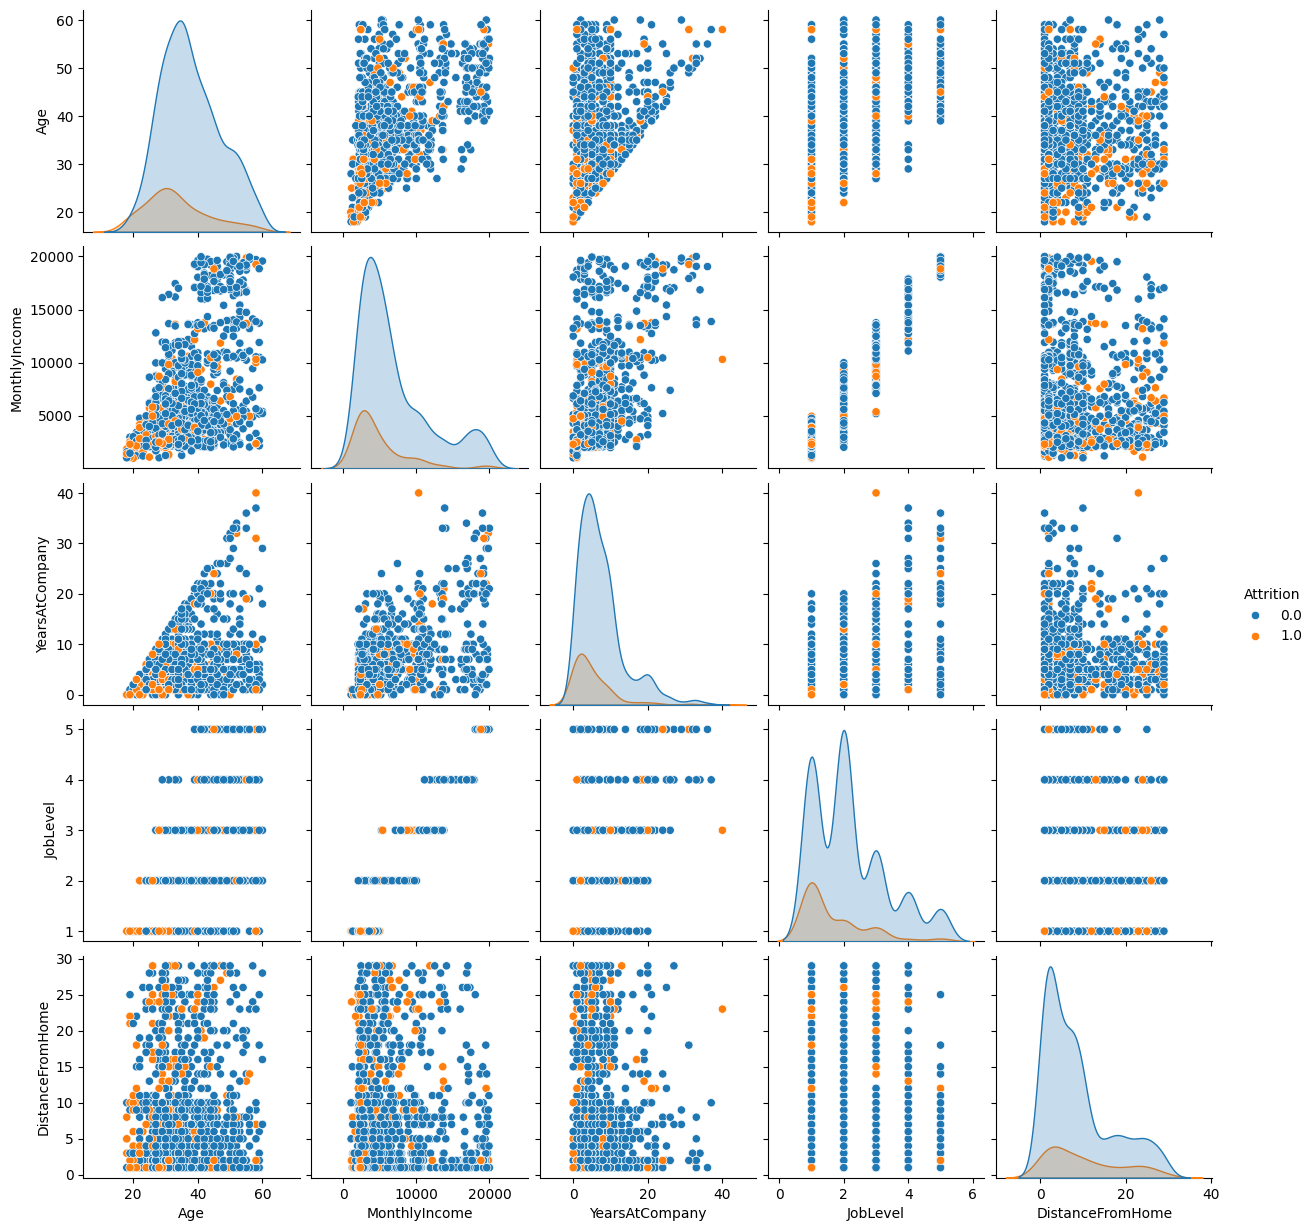

In [23]:
selected_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition','JobLevel','DistanceFromHome']
sns.pairplot(df[selected_cols].dropna(), hue='Attrition', diag_kind='kde')
plt.show()


## Data Preparation / Preprocessing

In [24]:
df.drop(columns=['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours','DailyRate','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'], inplace=True)


In [25]:
# # Nilai unik untuk kolom tertentu
# unique_business_travel = df['BusinessTravel'].unique()
# unique_department = df['Department'].unique()
# unique_education_field = df['EducationField'].unique()
# unique_gender = df['Gender'].unique()
# unique_job_role = df['JobRole'].unique()

# # Nilai minimum dan maksimum untuk 'Age' dan 'DistanceFromHome'
# min_age = df['Age'].min()
# max_age = df['Age'].max()

# min_distance_from_home = df['DistanceFromHome'].min()
# max_distance_from_home = df['DistanceFromHome'].max()

# # Tampilkan hasil
# print(f"Nilai Unik BusinessTravel: {unique_business_travel}")
# print(f"Nilai Unik Department: {unique_department}")
# print(f"Nilai Unik EducationField: {unique_education_field}")
# print(f"Nilai Unik Gender: {unique_gender}")
# print(f"Nilai Unik JobRole: {unique_job_role}")

# print(f"\nNilai Minimum dan Maksimum:")
# print(f"Umur - Minimum: {min_age}, Maksimum: {max_age}")
# print(f"DistanceFromHome - Minimum: {min_distance_from_home}, Maksimum: {max_distance_from_home}")

In [26]:
df_cleaned = df.dropna(subset=['Attrition'])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [28]:
df_cleaned = df_cleaned.apply(lambda x: object_to_int(x))
df_cleaned.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MonthlyIncome
1,37,1.0,2,1,11,3,0,0,4777
2,51,1.0,2,1,4,1,1,6,2461
3,42,0.0,1,2,26,2,0,7,13525
6,40,0.0,2,2,1,3,1,7,7457
7,55,1.0,2,1,2,3,1,3,19859


In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
df_cleaned.corr()['Attrition'].sort_values(ascending = False)

,Attrition
Attrition,1.000000
DistanceFromHome,0.078074
Department,0.060796
JobRole,0.056146
EducationField,0.040568
Gender,0.015887
BusinessTravel,-0.008008
MonthlyIncome,-0.163600
Age,-0.172067


<Figure size 1400x700 with 0 Axes>

In [30]:
X = df_cleaned.drop(columns = ['Attrition'])
y = df_cleaned['Attrition'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

## Modeling

In [32]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=11),
    "SVM": SVC(random_state=1),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

## Evaluation

In [33]:
# Menampilkan classification report untuk setiap model
for model_name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi dengan model
    predicted_y = model.predict(X_test)

    # Tampilkan classification report
    print(f"\n===== Classification Report for {model_name} =====")
    print(classification_report(y_test, predicted_y))


===== Classification Report for KNN =====
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       264
         1.0       0.44      0.13      0.20        54

    accuracy                           0.82       318
   macro avg       0.64      0.55      0.55       318
weighted avg       0.78      0.82      0.78       318


===== Classification Report for SVM =====
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       264
         1.0       0.00      0.00      0.00        54

    accuracy                           0.83       318
   macro avg       0.42      0.50      0.45       318
weighted avg       0.69      0.83      0.75       318


===== Classification Report for Decision Tree =====
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       264
         1.0       0.24      0.28      0.26        54

    accuracy                           0.73

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Save Model

In [34]:
import joblib
# Buat dan latih model
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

# Simpan model ke file
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']